In [1]:
import pandas as pd

df = pd.read_csv('/content/cinemaTicket_Ref.csv')
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5.0,2.0,5.0
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5.0,2.0,5.0
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5.0,2.0,5.0
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5.0,2.0,5.0
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106418,1482,529,1200000,10,0,4,5.56,120000.0,10,179.856115,2018-03-18,3.0,1.0,18.0
106419,1482,522,1080000,9,0,3,3.53,120000.0,9,254.957507,2018-03-18,3.0,1.0,18.0
106420,1482,50,900000,9,0,3,1.69,100000.0,9,532.544379,2018-03-18,3.0,1.0,18.0
106421,1482,338,640000,8,0,1,3.25,80000.0,8,246.153846,2018-03-18,3.0,1.0,18.0


In [2]:
df.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')

타겟 변수 : total_sales

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106423 entries, 0 to 106422
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     106423 non-null  int64  
 1   cinema_code   106423 non-null  int64  
 2   total_sales   106423 non-null  int64  
 3   tickets_sold  106423 non-null  int64  
 4   tickets_out   106423 non-null  int64  
 5   show_time     106423 non-null  int64  
 6   occu_perc     106331 non-null  float64
 7   ticket_price  106423 non-null  float64
 8   ticket_use    106423 non-null  int64  
 9   capacity      106331 non-null  float64
 10  date          106422 non-null  object 
 11  month         106422 non-null  float64
 12  quarter       106422 non-null  float64
 13  day           106422 non-null  float64
dtypes: float64(6), int64(7), object(1)
memory usage: 11.4+ MB


In [4]:
df.isnull().sum()

film_code        0
cinema_code      0
total_sales      0
tickets_sold     0
tickets_out      0
show_time        0
occu_perc       92
ticket_price     0
ticket_use       0
capacity        92
date             1
month            1
quarter          1
day              1
dtype: int64

In [5]:
mean1 = df['occu_perc'].mean()
mean2 = df['capacity'].mean()
df['occu_perc'].fillna(mean1, inplace=True)
df['capacity'].fillna(mean2, inplace=True)
df.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            1
month           1
quarter         1
day             1
dtype: int64

In [6]:
#1. 결측치 삭제 후 모델링 진행
#df1 = df.copy()
#df1.dropna(axis=0, inplace=True)
#df1.isnull().sum()

In [7]:
#월별 상영 횟수 시각화
df_count = df.groupby('month')['show_time'].sum().reset_index()
df_count['month'] = df_count['month'].astype('str').str.split('.').str[0]
df_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   month      10 non-null     object
 1   show_time  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [8]:
df_count

,month,show_time
0,2,3
1,3,33645
2,4,49443
3,5,49262
4,6,47215
5,7,66528
6,8,64237
7,9,41613
8,10,66336
9,11,6772


In [39]:
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import kaleido

In [47]:
!pip install gitly==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


There are few libs and modules that should be installed in Colab in order to generate static plots from Plotly.
Summary: Install Orca, update plotly and update apt-get

apt-get update
pip install plotly>=4.0.0
wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
chmod +x /usr/local/bin/orca
apt-get install xvfb libgtk2.0-0 libgconf-2-4
Done. Have fun! :)


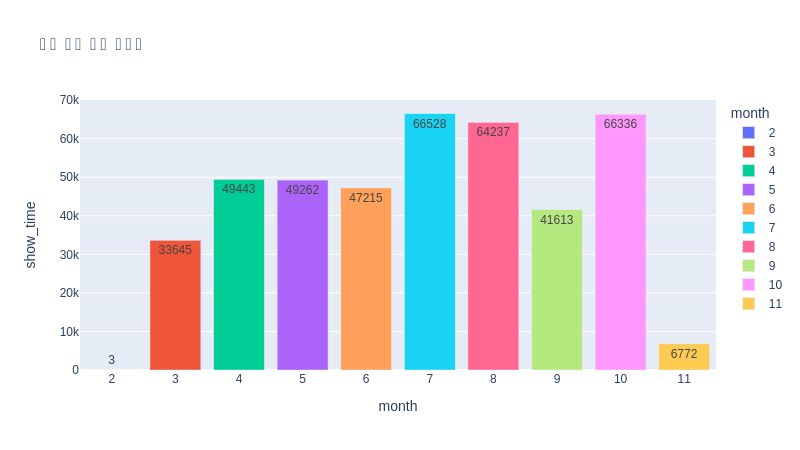

In [48]:
import plotly.express as px
import plotly.io as pio
from gitly.colab.plot import GitlyPlotter

gitly = GitlyPlotter('github')

fig = px.bar(df_count, x='month', y='show_time', color='month', text='show_time', title='월별 상영 횟수 시각화')
gitly.show( fig )

In [ ]:
#월별 판매 티켓 수 시각화
df3 = df.groupby('month')['tickets_sold'].sum().reset_index()
df3['month'] = df3['month'].astype('str').str.split('.').str[0] + '월'
df3

,month,tickets_sold
0,2월,270
1,3월,1832905
2,4월,4134613
3,5월,3052733
4,6월,1249595
5,7월,2992026
6,8월,2851380
7,9월,1074979
8,10월,2563955
9,11월,220511


In [ ]:
fig = px.pie(df3, values='tickets_sold', names = 'month', color = 'month', title='월별 판매 티켓 수 시각화')
fig.show()

In [ ]:
#월별 수익 시각화 
df4 = df.groupby('month')['total_sales'].sum().reset_index()
df4['month'] = df4['month'].astype('str').str.split('.').str[0]+'월'
df4

,month,total_sales
0,2월,32210000
1,3월,193433625732
2,4월,348614664007
3,5월,239595373317
4,6월,104001473893
5,7월,264855462688
6,8월,258296800764
7,9월,96569594964
8,10월,231675849820
9,11월,22708024998


In [ ]:
fig = px.line(df4, x='month', y='total_sales', title='월별 수익 시각화')
fig.show()

In [ ]:
df.columns

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day'],
      dtype='object')

In [ ]:
df.film_code.unique()

array([1492, 1567, 1497, 1498, 1494, 1486, 1496, 1511, 1563, 1589, 1566,
       1550, 1499, 1551, 1558, 1565, 1568, 1562, 1512, 1575, 1495, 1471,
       1480, 1559, 1570, 1584, 1587, 1484, 1553, 1573, 1571, 1483, 1552,
       1576, 1560, 1502, 1554, 1572, 1564, 1557, 1485, 1482, 1481, 1500,
       1578, 1493, 1556, 1569])

In [ ]:
#영화 코드별 상영 횟수 -> 어떤 영화가 가장 많이 상영됐는지 파악 
df['film_code'] = df['film_code'].astype('str')
df5 = df.groupby('film_code')['show_time'].sum().reset_index()
fig = px.bar(df5, x='film_code', y='show_time', color='film_code', text='show_time', title='영화 코드별 상영 횟수 시각화')
fig.show()


In [ ]:
#영화 코드별 total_sales 시각화 -> 상영횟수가 많은 영화일수록 수익이 높을까? 
df6 = df.groupby('film_code')['total_sales'].sum().reset_index()
fig = px.bar(df6, x='film_code', y='total_sales', color='film_code', text='total_sales', title='영화 코드별 수익 시각화')
fig.show()

In [ ]:
#영화 코드별 상영횟수 대비 티켓 환불율 시각화
df7 = df.groupby('film_code')['tickets_out'].sum().reset_index()
df7['tickets_out_per'] = (df7['tickets_out'] / df5['show_time']).round(2)
fig = px.bar(df7, x='film_code', y='tickets_out_per', color='film_code', text='tickets_out_per', title='영화 코드별 상영 횟수 대비 티켓 환불 비율')
fig.show()

In [ ]:
#모델링 전처리
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler

scaler = MinMaxScaler()

df1 = df.drop(columns=['film_code', 'cinema_code', 'date', 'month', 'quarter', 'day'])
Y = df1['total_sales']
df1.drop(columns='total_sales', inplace=True)
train_x, val_x, train_y, val_y = train_test_split(df1, Y, test_size=0.3, random_state=77)
print(train_x.shape, val_x.shape)

(99766, 7) (42758, 7)


In [ ]:
print(train_y.shape, val_y.shape)

(99766,) (42758,)


In [ ]:
train_x

,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity
75321,10,0,1,4.76,36000.000000,10,210.084034
14150,27,0,3,4.05,100000.000000,27,666.666667
76485,22,0,2,2.75,70000.000000,22,800.000000
87791,1927,0,8,64.32,50000.000000,1927,2995.957711
126762,66,0,7,3.41,105454.545455,66,1935.483871
...,...,...,...,...,...,...,...
110009,35,0,3,11.90,120000.000000,35,294.117647
25503,23,0,3,3.45,100000.000000,23,666.666667
138904,25,0,3,6.51,80000.000000,25,384.024578
107813,376,0,8,62.67,50000.000000,376,599.968087


In [ ]:
val_x

,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity
125902,192,0,7,12.22,146093.750000,192,1571.194763
136504,29,0,1,7.71,48275.862069,29,376.134890
26557,209,0,3,33.49,50000.000000,209,624.066886
57267,6,0,1,26.09,80000.000000,6,22.997317
107831,105,0,1,89.74,80000.000000,105,117.004680
...,...,...,...,...,...,...,...
50591,72,0,4,14.01,150000.000000,72,513.918630
10409,3,0,3,0.18,100000.000000,3,1666.666667
109842,502,0,4,87.15,40000.000000,502,576.018359
67258,486,0,4,60.67,79835.390947,486,801.054887


In [ ]:
train = pd.DataFrame(scaler.fit_transform(train_x))
#test = scaler.fit(val_x)

In [ ]:
train.columns = df1.columns
train

,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity
0,0.001141,0.0,0.000000,0.032271,0.049255,0.024997,0.022662
1,0.003296,0.0,0.033898,0.027458,0.140893,0.027101,0.071449
2,0.002662,0.0,0.016949,0.018644,0.097938,0.026482,0.085696
3,0.244168,0.0,0.118644,0.436068,0.069301,0.262220,0.320339
4,0.008240,0.0,0.101695,0.023119,0.148704,0.031927,0.207025
...,...,...,...,...,...,...,...
99761,0.004310,0.0,0.033898,0.080678,0.169530,0.028091,0.031641
99762,0.002789,0.0,0.033898,0.023390,0.140893,0.026606,0.071449
99763,0.003043,0.0,0.033898,0.044136,0.112257,0.026853,0.041248
99764,0.047541,0.0,0.118644,0.424881,0.069301,0.070288,0.064322


In [ ]:
train_y = pd.DataFrame(train_y).reset_index()
train_y.drop(columns=['index'], inplace=True)
train_y

,total_sales
0,360000
1,2700000
2,1540000
3,96350000
4,6960000
...,...
99761,4200000
99762,2300000
99763,2000000
99764,18800000


In [ ]:
train

,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity
0,0.001141,0.0,0.000000,0.032271,0.049255,0.024997,0.022662
1,0.003296,0.0,0.033898,0.027458,0.140893,0.027101,0.071449
2,0.002662,0.0,0.016949,0.018644,0.097938,0.026482,0.085696
3,0.244168,0.0,0.118644,0.436068,0.069301,0.262220,0.320339
4,0.008240,0.0,0.101695,0.023119,0.148704,0.031927,0.207025
...,...,...,...,...,...,...,...
99761,0.004310,0.0,0.033898,0.080678,0.169530,0.028091,0.031641
99762,0.002789,0.0,0.033898,0.023390,0.140893,0.026606,0.071449
99763,0.003043,0.0,0.033898,0.044136,0.112257,0.026853,0.041248
99764,0.047541,0.0,0.118644,0.424881,0.069301,0.070288,0.064322


In [ ]:
#1. k-fold를 활용한 lightGBM
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=5, shuffle=True, random_state=77)

In [ ]:
for train_idx, val_idx in k_fold.split(train) :
  print(len(train_idx), len(val_idx))
  break

79812 19954


In [ ]:
import lightgbm as lgb

model = lgb.LGBMRegressor(random_state=77, n_estimators=1000)
models = []
for train_idx, val_idx in k_fold.split(train) : 
  train_x = train.iloc[train_idx]
  y_train = train_y.iloc[train_idx]
  val_x = train.iloc[val_idx]
  val_y = train_y.iloc[val_idx]
  models.append(model.fit(train_x, y_train, eval_set=(val_x, val_y), early_stopping_rounds=100, verbose=100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 6.3645e+12
[200]	valid_0's l2: 4.42906e+12
[300]	valid_0's l2: 3.68626e+12
[400]	valid_0's l2: 3.38097e+12
[500]	valid_0's l2: 3.23078e+12
[600]	valid_0's l2: 3.21317e+12
[700]	valid_0's l2: 3.20461e+12
Early stopping, best iteration is:
[614]	valid_0's l2: 3.17955e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.25456e+12
[200]	valid_0's l2: 2.2703e+12
Early stopping, best iteration is:
[136]	valid_0's l2: 2.18485e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.24041e+13
[200]	valid_0's l2: 8.63207e+12
[300]	valid_0's l2: 6.46231e+12
[400]	valid_0's l2: 5.55708e+12
[500]	valid_0's l2: 5.15211e+12
[600]	valid_0's l2: 4.73724e+12
[700]	valid_0's l2: 4.58073e+12
[800]	valid_0's l2: 4.40395e+12
[900]	valid_0's l2: 4.28281e+12
[1000]	valid_0's l2: 4.18499e+12
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 4

In [ ]:
pred = []
for model in models :
  pred.append(model.predict(val_x))

In [ ]:
pd.DataFrame(pred)

,0,1,2,3,4,5,6,7,8,9,...,19943,19944,19945,19946,19947,19948,19949,19950,19951,19952
0,1.020634e+08,1.935298e+06,2.443539e+07,1.447457e+06,9.061271e+06,1.340525e+06,1.316549e+07,3.259564e+06,792740.499124,8.388213e+07,...,1640538.533,1.760146e+06,3.234684e+07,1.083495e+07,9.554183e+06,9.219374e+06,2.309045e+07,1.845996e+06,344673.409387,4.152501e+06
1,1.020634e+08,1.935298e+06,2.443539e+07,1.447457e+06,9.061271e+06,1.340525e+06,1.316549e+07,3.259564e+06,792740.499124,8.388213e+07,...,1640538.533,1.760146e+06,3.234684e+07,1.083495e+07,9.554183e+06,9.219374e+06,2.309045e+07,1.845996e+06,344673.409387,4.152501e+06
2,1.020634e+08,1.935298e+06,2.443539e+07,1.447457e+06,9.061271e+06,1.340525e+06,1.316549e+07,3.259564e+06,792740.499124,8.388213e+07,...,1640538.533,1.760146e+06,3.234684e+07,1.083495e+07,9.554183e+06,9.219374e+06,2.309045e+07,1.845996e+06,344673.409387,4.152501e+06
3,1.020634e+08,1.935298e+06,2.443539e+07,1.447457e+06,9.061271e+06,1.340525e+06,1.316549e+07,3.259564e+06,792740.499124,8.388213e+07,...,1640538.533,1.760146e+06,3.234684e+07,1.083495e+07,9.554183e+06,9.219374e+06,2.309045e+07,1.845996e+06,344673.409387,4.152501e+06
4,1.020634e+08,1.935298e+06,2.443539e+07,1.447457e+06,9.061271e+06,1.340525e+06,1.316549e+07,3.259564e+06,792740.499124,8.388213e+07,...,1640538.533,1.760146e+06,3.234684e+07,1.083495e+07,9.554183e+06,9.219374e+06,2.309045e+07,1.845996e+06,344673.409387,4.152501e+06


In [ ]:
import numpy as np
val_x['predict'] = np.mean(pred, axis=0).round(0)
val_x = pd.concat([val_x, val_y], axis=1)
val_x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,predict,total_sales
3,0.244168,0.000000,0.118644,0.436068,0.069301,0.262220,0.320339,102063401.0,96350000
5,0.006212,0.000000,0.016949,0.156949,0.054983,0.029947,0.023292,1935298.0,2000000
8,0.037399,0.000000,0.101695,0.245017,0.112257,0.060389,0.087730,24435394.0,23680000
9,0.002409,0.000000,0.016949,0.028068,0.097938,0.026234,0.051833,1447457.0,1400000
12,0.018636,0.037736,0.186441,0.022915,0.083620,0.040837,0.468087,9061271.0,8880000
...,...,...,...,...,...,...,...,...,...
99743,0.015720,0.000000,0.016949,0.074576,0.100916,0.039228,0.121637,9219374.0,9010000
99749,0.028905,0.000000,0.118644,0.114169,0.142894,0.052098,0.145518,23090449.0,23220000
99750,0.004564,0.000000,0.000000,0.126712,0.069301,0.028338,0.021367,1845996.0,1850000
99754,0.000634,0.000000,0.067797,0.001966,0.069301,0.024502,0.221287,344673.0,300000


In [ ]:
#2. XGBoost
